In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv('loan_prediction.csv')  # read the data
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#first drop unnessesary column then remove duplicates & recheck the size
data=data.drop(columns=['Loan_ID','Married'],axis=1)

data.drop_duplicates(inplace=True)

print(data.shape)

(614, 11)


In [4]:
# check the no. of rows & column & finding the count of missing value
print(data.isna().sum())

#printing the summary of data type
data.info() 

Gender               13
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    ob

In [5]:
#understand data at high level check the stastics of dataset
data.describe(include='all')

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [6]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode())
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode())
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode())
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [7]:
data=data.dropna()
data.shape

(554, 11)

In [8]:
#understand data at high level check the stastics of dataset again 
data.describe(include='all')

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,554,554,554,554,554.000000,554.000000,554.000000,554.000000,554.000000,554,554
unique,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,453,319,431,478,NaN,NaN,NaN,NaN,NaN,211,382
mean,NaN,NaN,NaN,NaN,5267.059567,1585.575668,144.969009,341.956679,0.843348,NaN,NaN
std,NaN,NaN,NaN,NaN,5455.163295,2524.484889,81.078416,64.727653,0.349310,NaN,NaN
min,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2843.750000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,3839.500000,1149.000000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,5818.750000,2297.250000,166.750000,360.000000,1.000000,NaN,NaN


In [9]:
# Lets frist covert categorical data into int 
label = LabelEncoder()
df=label.fit_transform(data['Gender']) 
pd.Series(df)
data["Gender"]=df

In [10]:
df=label.fit_transform(data['Education']) 
pd.Series(df)
data["Education"]=df

In [11]:
df=label.fit_transform(data['Self_Employed']) 
pd.Series(df)
data["Self_Employed"]=df

In [12]:
df=label.fit_transform(data['Loan_Status']) 
pd.Series(df)
data["Loan_Status"]=df

In [13]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Dependents', 'Property_Area']

In [14]:
df_dummies=pd.get_dummies(data[cat_col],drop_first=True)
data=data.join(df_dummies) #join to orignal dataset

In [15]:
data.drop(columns=(cat_col),axis=1,inplace=True)

In [16]:
data.head()

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,0
2,1,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,1
3,1,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,1
4,1,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1


In [17]:
data.shape

(554, 14)

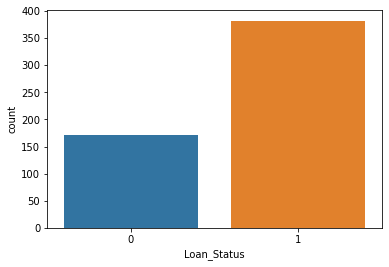

In [18]:
#plot each class frequency
sns.countplot(x='Loan_Status',data=data)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

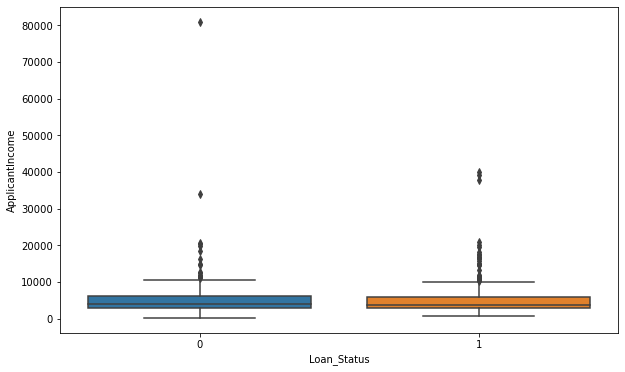

In [19]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.boxplot(y ='ApplicantIncome', x ='Loan_Status', data = data)

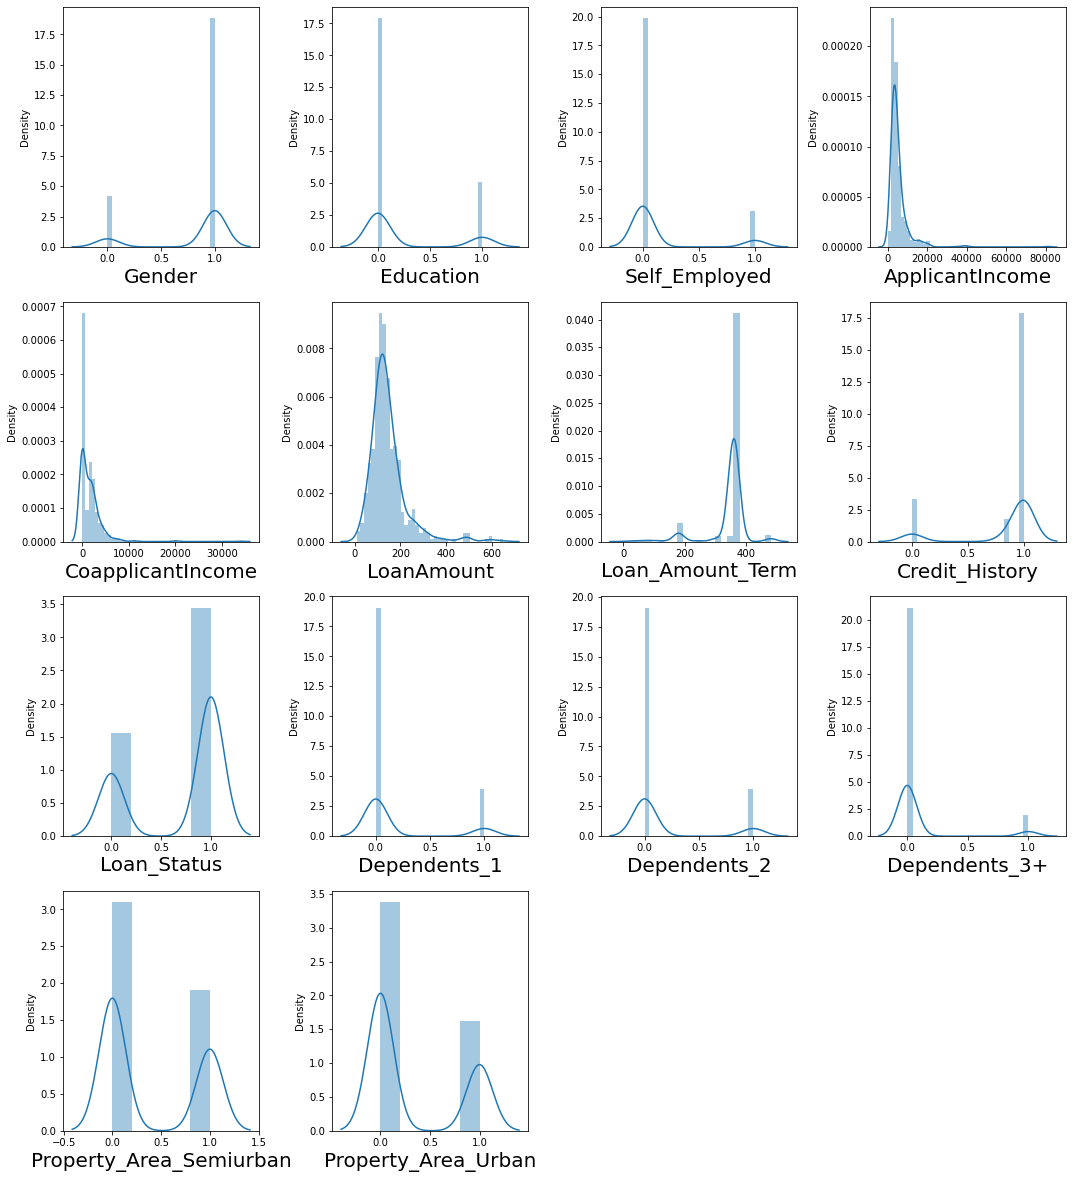

In [20]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

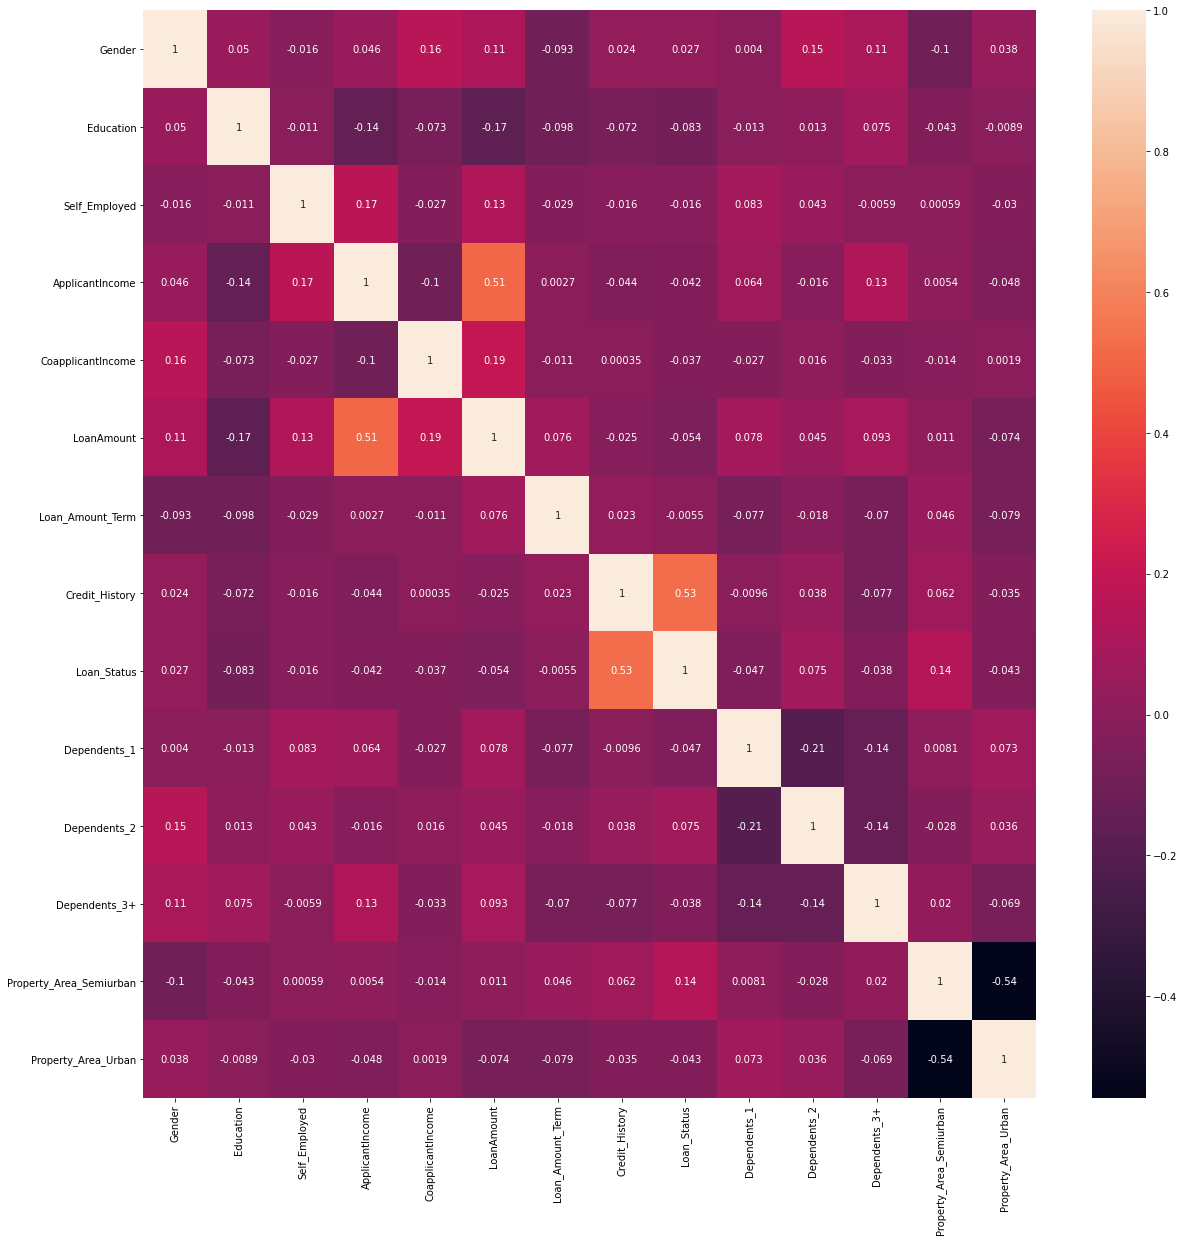

In [21]:
#check multicolinearity
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [22]:
#As outliers present in features first remove it 
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [23]:
ApplicantIncome_H=(q3.ApplicantIncome+(1.5*iqr.ApplicantIncome))
CoapplicantIncome_H=(q3.CoapplicantIncome+(1.5*iqr.CoapplicantIncome))
LoanAmount_H=(q3.LoanAmount+(1.5*iqr.LoanAmount))

In [24]:
Index=np.where(data['ApplicantIncome']>ApplicantIncome_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([  9,  28,  48,  61,  97, 103, 107, 114, 116, 124, 130, 132, 141,
       166, 168, 173, 181, 231, 235, 247, 254, 260, 281, 296, 333, 334,
       370, 384, 396, 401, 428, 430, 435, 439, 445, 458, 460, 475, 483,
       484, 509, 519, 537, 544], dtype=int64),)


(510, 14)

In [25]:
Index=np.where(data['CoapplicantIncome']>CoapplicantIncome_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([ 10,  30, 102, 112, 147, 150, 213, 290, 310, 337, 350, 372, 427,
       436, 484], dtype=int64),)


(495, 14)

In [26]:
Index=np.where(data['LoanAmount']>LoanAmount_H)
print(Index)
data=data.drop(data.index[Index])
data.shape

(array([  5,  17, 129, 188, 211, 266, 284, 308, 317, 415, 431], dtype=int64),)


(484, 14)

In [27]:
data.reset_index()
data

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,0
2,1,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,1
3,1,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,1
4,1,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,2900,0.0,71.000000,360.0,1.0,1,0,0,0,0,0
610,1,0,0,4106,0.0,40.000000,180.0,1.0,1,0,0,1,0,0
611,1,0,0,8072,240.0,253.000000,360.0,1.0,1,1,0,0,0,1
612,1,0,0,7583,0.0,187.000000,360.0,1.0,1,0,1,0,0,1


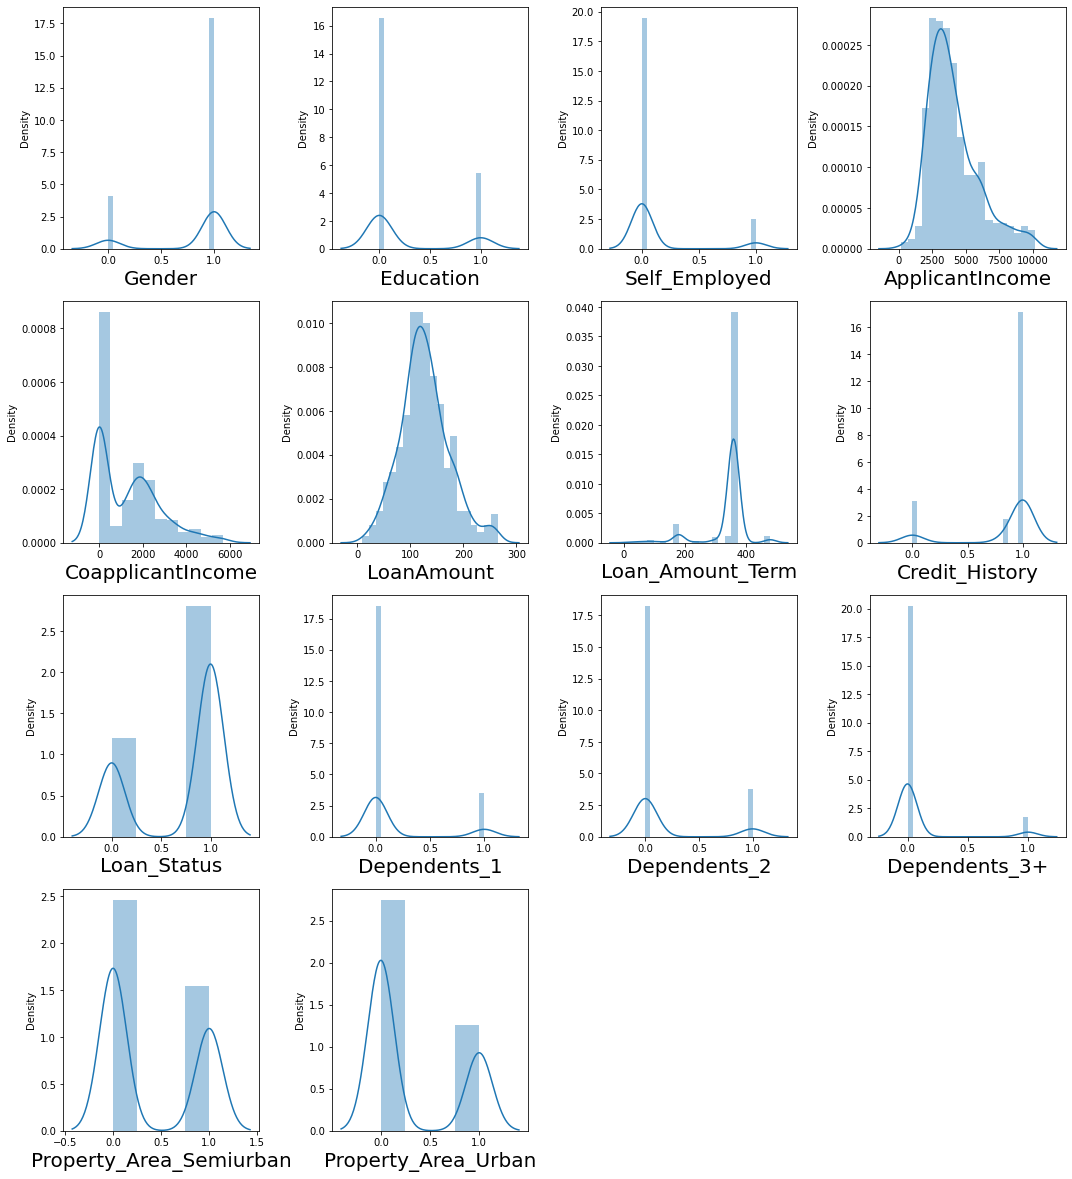

In [28]:
#Let's see the distribution after removing outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [29]:
# Let's Seperate the data 
x=data.drop(columns=['Loan_Status'])
y=data['Loan_Status']

In [30]:
print(data['Loan_Status'].value_counts())

1    339
0    145
Name: Loan_Status, dtype: int64


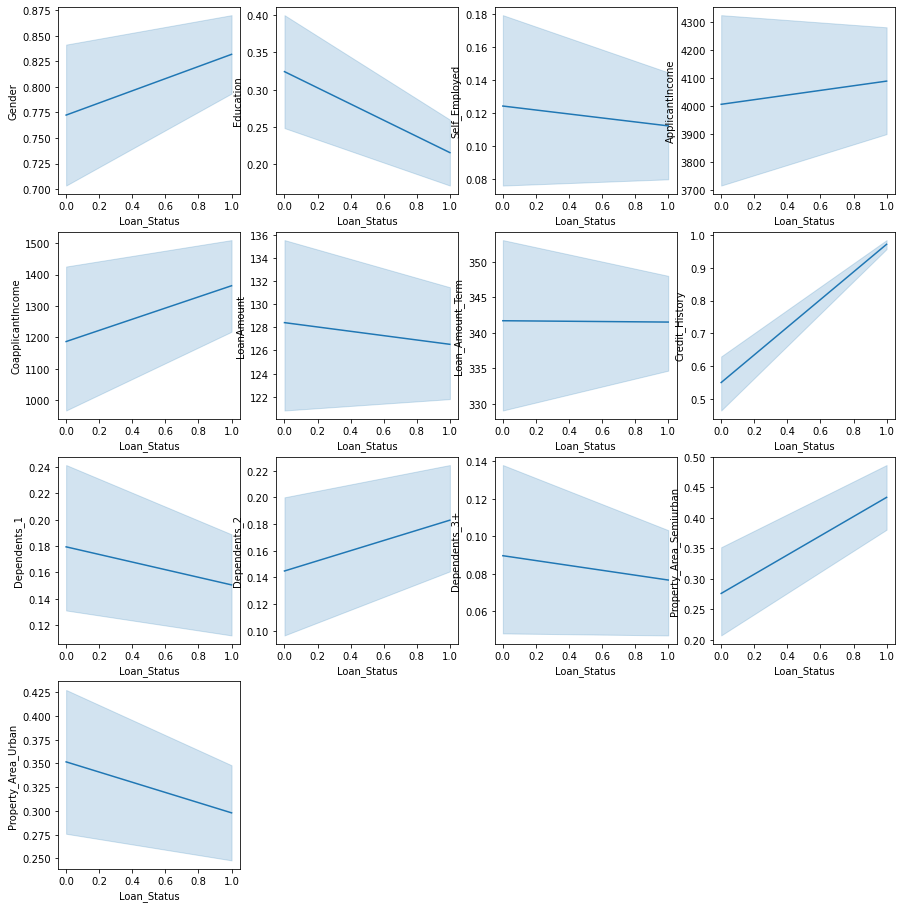

In [31]:
# see how featurs r related to lable(Graphical Univariate Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [32]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [59]:
#Split data into train & test by using this new fetures
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.35,random_state=855)

In [77]:
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.90)
x_train_ns,y_train_ns=ove_smp.fit_sample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({1: 224, 0: 90})
Counter({1: 224, 0: 201})


In [78]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",r2_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [79]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [80]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.06549840085287872
Test Report: 0.7352941176470589
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.49      0.55        55
           1       0.78      0.85      0.81       115

    accuracy                           0.74       170
   macro avg       0.70      0.67      0.68       170
weighted avg       0.72      0.74      0.73       170

Confusion Matrix: [[27 28]
 [17 98]]
Accuracy: 72.95 %
Standard Deviation: 2.52 %


In [81]:
# Model no.2
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 1.0
Test Report: 0.7764705882352941
Classification Report:               precision    recall  f1-score   support

           0       0.74      0.47      0.58        55
           1       0.79      0.92      0.85       115

    accuracy                           0.78       170
   macro avg       0.76      0.70      0.71       170
weighted avg       0.77      0.78      0.76       170

Confusion Matrix: [[ 26  29]
 [  9 106]]
Accuracy: 81.18 %
Standard Deviation: 2.78 %


In [82]:
#Model no.3
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 1.0
Test Report: 0.7235294117647059
Classification Report:               precision    recall  f1-score   support

           0       0.57      0.56      0.57        55
           1       0.79      0.80      0.80       115

    accuracy                           0.72       170
   macro avg       0.68      0.68      0.68       170
weighted avg       0.72      0.72      0.72       170

Confusion Matrix: [[31 24]
 [23 92]]
Accuracy: 76.48 %
Standard Deviation: 4.65 %


In [83]:
#Model no.4
from sklearn.ensemble import BaggingClassifier

bb=BaggingClassifier()

bb.fit(x_train_ns,y_train_ns)

print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9528029495380241
Test Report: 0.7411764705882353
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.55      0.58        55
           1       0.79      0.83      0.81       115

    accuracy                           0.74       170
   macro avg       0.70      0.69      0.70       170
weighted avg       0.73      0.74      0.74       170

Confusion Matrix: [[30 25]
 [19 96]]
Accuracy: 79.30 %
Standard Deviation: 2.77 %


In [84]:
#Model no.5
import xgboost as xgb

xgb=xgb.XGBClassifier()

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 1.0
Test Report: 0.7470588235294118
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.53      0.57        55
           1       0.79      0.85      0.82       115

    accuracy                           0.75       170
   macro avg       0.71      0.69      0.70       170
weighted avg       0.74      0.75      0.74       170

Confusion Matrix: [[29 26]
 [17 98]]
Accuracy: 78.83 %
Standard Deviation: 1.83 %


In [109]:
# Hyper tuning by using GridSearchCV

from sklearn.model_selection import GridSearchCV

para={'max_features':[7,8,9,10],'random_state':[30,41,355]}
grid=GridSearchCV(estimator=dt, param_grid=para,cv=2)
grid.fit(x_train_ns,y_train_ns)

print(grid.best_params_)

{'max_features': 10, 'random_state': 30}


In [110]:
bb=BaggingClassifier(max_features=10,random_state=30)

bb.fit(x_train_ns,y_train_ns)

print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(bb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(bb)

Train Report: 0.9811211798152096
Test Report: 0.7352941176470589
Classification Report:               precision    recall  f1-score   support

           0       0.59      0.60      0.59        55
           1       0.81      0.80      0.80       115

    accuracy                           0.74       170
   macro avg       0.70      0.70      0.70       170
weighted avg       0.74      0.74      0.74       170

Confusion Matrix: [[33 22]
 [23 92]]
Accuracy: 78.82 %
Standard Deviation: 1.46 %


In [111]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':range(2,60,10),'max_depth':range(0,20,2),'min_samples_split':range(2,20,2)}
rand=RandomizedSearchCV(estimator=rand_clf,param_distributions=para)
rand.fit(x_train_ns,y_train_ns)

rand.best_params_

{'n_estimators': 32, 'min_samples_split': 2, 'max_depth': 8}

In [112]:
rand_clf= RandomForestClassifier(n_estimators=32, min_samples_split=2, max_depth=8)
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 0.830090618336887
Test Report: 0.7705882352941177
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.49      0.58        55
           1       0.79      0.90      0.84       115

    accuracy                           0.77       170
   macro avg       0.75      0.70      0.71       170
weighted avg       0.76      0.77      0.76       170

Confusion Matrix: [[ 27  28]
 [ 11 104]]
Accuracy: 78.83 %
Standard Deviation: 1.36 %


# Looking at accuracy, ROC AUC Curve & confusion matrix i m selecting BaggingClassifier with GridSearchCV hypertune parameter by using Kfold cross validation method¶

# lets check ROC AUC curve for fitted model¶

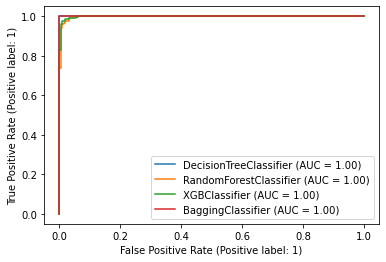

In [113]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(xgb,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(bb,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets check how our model works on test data¶

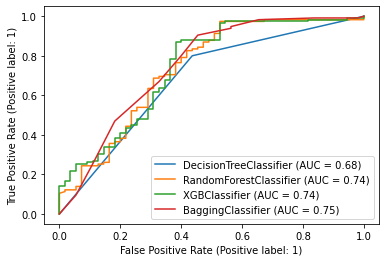

In [114]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bb,x_test,y_test,ax=disp.ax_)